In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
plt.style.use('default')

In [104]:
sns.set_theme(style="whitegrid")

# 2. Force Global Parameters to Black
plt.rcParams.update({
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

In [171]:
df = pd.read_csv("NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv")
df

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8


In [172]:
df.shape

(205920, 13)

In [173]:
df.columns

Index(['Year', 'Cause of Death', 'State', 'State FIPS Code', 'HHS Region',
       'Age Range', 'Benchmark', 'Locality', 'Observed Deaths', 'Population',
       'Expected Deaths', 'Potentially Excess Deaths',
       'Percent Potentially Excess Deaths'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               205920 non-null  int64  
 1   Cause of Death                     205920 non-null  object 
 2   State                              205920 non-null  object 
 3   State FIPS Code                    205920 non-null  object 
 4   HHS Region                         205920 non-null  int64  
 5   Age Range                          205920 non-null  object 
 6   Benchmark                          205920 non-null  object 
 7   Locality                           205920 non-null  object 
 8   Observed Deaths                    195708 non-null  float64
 9   Population                         200640 non-null  float64
 10  Expected Deaths                    195708 non-null  float64
 11  Potentially Excess Deaths          1957

In [175]:
df.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,205920.000000,205920.000000,195708.000000,2.006400e+05,195708.000000,195708.000000,195708.000000
mean,2010.000000,5.230769,2974.568490,7.008421e+06,2112.863092,875.121043,35.728369
std,3.162285,2.798464,17164.665931,2.861818e+07,13291.617895,4410.206402,18.810895
min,2005.000000,0.000000,10.000000,5.553600e+04,2.000000,0.000000,0.000000
25%,2007.000000,3.000000,155.000000,6.828258e+05,92.000000,41.000000,20.900000
50%,2010.000000,5.000000,508.000000,1.610936e+06,298.000000,159.000000,35.800000
75%,2013.000000,8.000000,1586.000000,4.681585e+06,1019.000000,543.000000,50.100000
max,2015.000000,10.000000,493526.000000,3.151317e+08,465126.000000,175703.000000,85.300000


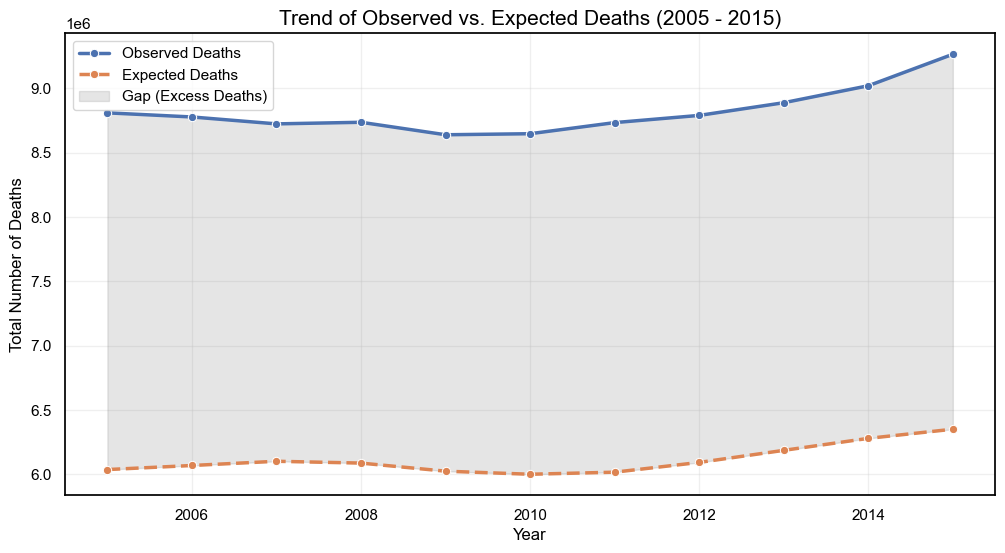

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data: Filter for 'All' localities to avoid double-counting 
# and use 'Floating' benchmark for consistent comparison
ts_data = df[(df['Locality'] == 'All') & (df['Benchmark'] == 'Floating')]
ts_data = ts_data.groupby('Year')[['Observed Deaths', 'Expected Deaths']].sum().reset_index()
ts_data['Observed Deaths'] = ts_data['Observed Deaths'].fillna(ts_data['Observed Deaths'].median())
ts_data['Expected Deaths'] = ts_data['Expected Deaths'].fillna(ts_data['Expected Deaths'].median())
# 2. Create the Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=ts_data, x='Year', y='Observed Deaths', label='Observed Deaths', marker='o', linewidth=2.5)
sns.lineplot(data=ts_data, x='Year', y='Expected Deaths', label='Expected Deaths', marker='o', linestyle='--', linewidth=2.5)

# Fill the area between lines to emphasize "Excess Deaths"
plt.fill_between(ts_data['Year'], ts_data['Expected Deaths'], ts_data['Observed Deaths'], color='gray', alpha=0.2, label='Gap (Excess Deaths)')

plt.title('Trend of Observed vs. Expected Deaths (2005 - 2015)', fontsize=15)
plt.ylabel('Total Number of Deaths')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [177]:
df.isnull().sum()

Year                                     0
Cause of Death                           0
State                                    0
State FIPS Code                          0
HHS Region                               0
Age Range                                0
Benchmark                                0
Locality                                 0
Observed Deaths                      10212
Population                            5280
Expected Deaths                      10212
Potentially Excess Deaths            10212
Percent Potentially Excess Deaths    10212
dtype: int64

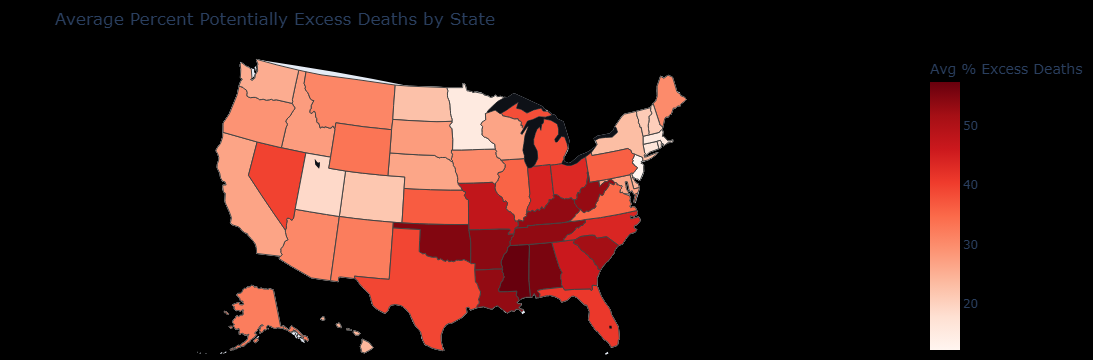

In [178]:
import plotly.express as px
import pandas as pd

state_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}
map_df = df.copy()
map_df = map_df[map_df['State'] != 'United States']
map_df['State_Code'] = map_df['State'].map(state_map)
map_df['Percent Potentially Excess Deaths'] = map_df['Percent Potentially Excess Deaths'].fillna(0)
state_data = map_df.groupby(['State', 'State_Code'])['Percent Potentially Excess Deaths'].agg(['mean', 'count']).reset_index()
state_data.columns = ['State', 'State_Code', 'Percent Potentially Excess Deaths', 'Data_Points']

fig = px.choropleth(
    state_data,
    locations='State_Code', 
    locationmode="USA-states", 
    color='Percent Potentially Excess Deaths',
    hover_name='State', 
    scope="usa",
    color_continuous_scale="Reds",
    title='Average Percent Potentially Excess Deaths by State',
    labels={'Percent Potentially Excess Deaths': 'Avg % Excess Deaths'}
)

fig.update_layout(
    paper_bgcolor='#000000',
    plot_bgcolor='#FFFFFF',
    margin={"r":0,"t":50,"l":0,"b":0},
    geo=dict(
        bgcolor='#000000',
        lakecolor='#0E1117',      
        showlakes=True
    )
)
fig.show()

<Axes: ylabel='Count'>

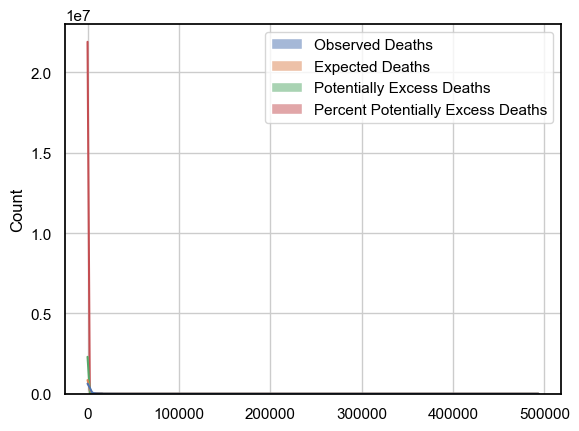

In [179]:
sns.histplot(
    data=df[['Observed Deaths','Expected Deaths','Potentially Excess Deaths','Percent Potentially Excess Deaths']], 
    kde=True,
    bins=30,
    color='#1f77b4'
)

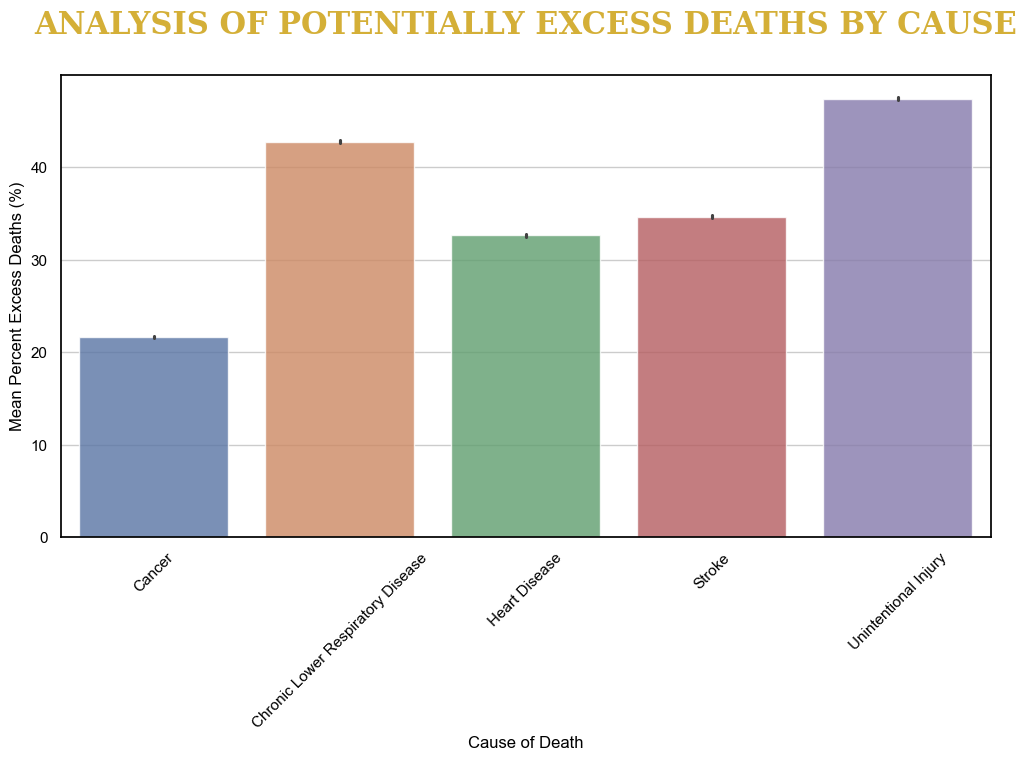

In [180]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Cause of Death', y='Percent Potentially Excess Deaths', hue='Cause of Death',alpha=0.8)
plt.xticks(rotation=45)
plt.title('ANALYSIS OF POTENTIALLY EXCESS DEATHS BY CAUSE', 
          color='#D4AF37', fontsize=22, family='serif', fontweight='bold', pad=30)
plt.ylabel('Mean Percent Excess Deaths (%)')
plt.show()

In [181]:
df_cpy = df.copy()

In [182]:
df_cause_of_death = pd.get_dummies(df['Cause of Death'],drop_first=True)
df_hhs = pd.get_dummies(df['HHS Region'],drop_first=True)
df_locality = pd.get_dummies(df['Locality'],drop_first=True)
df_benchmark = pd.get_dummies(df['Benchmark'],drop_first=True)

In [183]:
df.drop('State',axis=1,inplace=True)
print(len(df.columns))

12


In [184]:
df['HHS Region'].unique()

array([ 4, 10,  9,  6,  3,  8,  1,  2,  5,  7,  0])

In [185]:
df['Cause of Death'].unique()

array(['Cancer', 'Chronic Lower Respiratory Disease', 'Heart Disease',
       'Stroke', 'Unintentional Injury'], dtype=object)

In [186]:
df['Benchmark'].unique()

array(['2005 Fixed', '2010 Fixed', 'Floating'], dtype=object)

In [187]:
df

,Year,Cause of Death,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...
205915,2015,Unintentional Injury,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,2015,Unintentional Injury,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,2015,Unintentional Injury,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,2015,Unintentional Injury,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8


In [188]:
df = pd.concat([df_cause_of_death.astype('int'),df_hhs.astype('int'),df_locality.astype('int'),df_benchmark.astype('int'),df],axis=1)

In [189]:
df

,Chronic Lower Respiratory Disease,Heart Disease,Stroke,Unintentional Injury,1,2,3,4,5,6,...,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8


In [190]:
df = df.rename(columns={
    'Chronic Lower Respiratory Disease' : 'COD_Chronic Lower Respiratory Disease',
    'Heart Disease' : 'COD_Heart Disease',
    'Stroke' : 'COD_Stroke',
    'Unintentional Injury' : 'COD_Unintentional Injury',
     1 : 'HHS_Region_1',
     2 : 'HHS_Region_2',
     3 : 'HHS_Region_3',
     4 : 'HHS_Region_4',
     5 : 'HHS_Region_5',
     6 : 'HHS_Region_6',
     7 : 'HHS_Region_7',
     8 : 'HHS_Region_8',
     9 : 'HHS_Region_9',
     10 : 'HHS_Region_10',
    'Metropolitan' : 'Locality_Metropolitan',
    'Nonmetropolitan' : 'Locality_Nonmetropolitan',
    '2010 Fixed' : 'Benchmark_2010 Fixed',
    'Floating' : 'Benchmark_Floating'
})

In [191]:
df.columns.tolist()

['COD_Chronic Lower Respiratory Disease',
 'COD_Heart Disease',
 'COD_Stroke',
 'COD_Unintentional Injury',
 'HHS_Region_1',
 'HHS_Region_2',
 'HHS_Region_3',
 'HHS_Region_4',
 'HHS_Region_5',
 'HHS_Region_6',
 'HHS_Region_7',
 'HHS_Region_8',
 'HHS_Region_9',
 'HHS_Region_10',
 'Locality_Metropolitan',
 'Locality_Nonmetropolitan',
 'Benchmark_2010 Fixed',
 'Benchmark_Floating',
 'Year',
 'Cause of Death',
 'State FIPS Code',
 'HHS Region',
 'Age Range',
 'Benchmark',
 'Locality',
 'Observed Deaths',
 'Population',
 'Expected Deaths',
 'Potentially Excess Deaths',
 'Percent Potentially Excess Deaths']

In [192]:
df['Year']

0         2005
1         2005
2         2005
3         2005
4         2005
          ... 
205915    2015
205916    2015
205917    2015
205918    2015
205919    2015
Name: Year, Length: 205920, dtype: int64

In [193]:
df['Year'] = df['Year'] - min(df['Year'])

In [194]:
df['Year']

0          0
1          0
2          0
3          0
4          0
          ..
205915    10
205916    10
205917    10
205918    10
205919    10
Name: Year, Length: 205920, dtype: int64

In [195]:
df.drop(['HHS Region','Benchmark','Locality'],axis=1,inplace=True)

In [196]:
df

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Benchmark_Floating,Year,Cause of Death,State FIPS Code,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,Cancer,AL,0-49,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,Cancer,AL,0-49,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,Cancer,AL,0-49,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,0,0,Cancer,AL,0-49,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,0,0,Cancer,AL,0-49,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,0,10,Unintentional Injury,WY,0-84,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,0,10,Unintentional Injury,WY,0-84,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,1,10,Unintentional Injury,WY,0-84,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,1,10,Unintentional Injury,WY,0-84,93.0,175787.0,42.0,51.0,54.8


In [197]:
df.drop(['Cause of Death'],axis=1,inplace=True)

In [198]:
df

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Benchmark_2010 Fixed,Benchmark_Floating,Year,State FIPS Code,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,AL,0-49,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,AL,0-49,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,AL,0-49,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,AL,0-49,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,AL,0-49,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,1,0,10,WY,0-84,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,1,0,10,WY,0-84,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,0,1,10,WY,0-84,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,0,1,10,WY,0-84,93.0,175787.0,42.0,51.0,54.8


In [199]:
df.drop(['State FIPS Code'],axis=1,inplace=True)

In [200]:
df

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Locality_Nonmetropolitan,Benchmark_2010 Fixed,Benchmark_Floating,Year,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0-49,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0-49,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0-49,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0-49,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0-49,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,0,1,0,10,0-84,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,1,1,0,10,0-84,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,0-84,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,0-84,93.0,175787.0,42.0,51.0,54.8


In [201]:
df['Age Range'].unique()

array(['0-49', '0-54', '0-59', '0-64', '0-69', '0-74', '0-79', '0-84'],
      dtype=object)

In [202]:
def mapping(map_age):
    if map_age in ['0-79','0-84']:
        return 3
    elif map_age in ['0-64','0-69','0-74']:
        return 2
    else:
        return 1

df['Age Range'] = df['Age Range'].apply(mapping).astype(int)
df['Age Range']

0         1
1         1
2         1
3         1
4         1
         ..
205915    3
205916    3
205917    3
205918    3
205919    3
Name: Age Range, Length: 205920, dtype: int64

In [203]:
df

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Locality_Nonmetropolitan,Benchmark_2010 Fixed,Benchmark_Floating,Year,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,0,1,0,10,3,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,1,1,0,10,3,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,93.0,175787.0,42.0,51.0,54.8


In [204]:
df.columns

Index(['COD_Chronic Lower Respiratory Disease', 'COD_Heart Disease',
       'COD_Stroke', 'COD_Unintentional Injury', 'HHS_Region_1',
       'HHS_Region_2', 'HHS_Region_3', 'HHS_Region_4', 'HHS_Region_5',
       'HHS_Region_6', 'HHS_Region_7', 'HHS_Region_8', 'HHS_Region_9',
       'HHS_Region_10', 'Locality_Metropolitan', 'Locality_Nonmetropolitan',
       'Benchmark_2010 Fixed', 'Benchmark_Floating', 'Year', 'Age Range',
       'Observed Deaths', 'Population', 'Expected Deaths',
       'Potentially Excess Deaths', 'Percent Potentially Excess Deaths'],
      dtype='object')

In [205]:

df.isnull().sum()

COD_Chronic Lower Respiratory Disease        0
COD_Heart Disease                            0
COD_Stroke                                   0
COD_Unintentional Injury                     0
HHS_Region_1                                 0
HHS_Region_2                                 0
HHS_Region_3                                 0
HHS_Region_4                                 0
HHS_Region_5                                 0
HHS_Region_6                                 0
HHS_Region_7                                 0
HHS_Region_8                                 0
HHS_Region_9                                 0
HHS_Region_10                                0
Locality_Metropolitan                        0
Locality_Nonmetropolitan                     0
Benchmark_2010 Fixed                         0
Benchmark_Floating                           0
Year                                         0
Age Range                                    0
Observed Deaths                          10212
Population   

In [206]:
num_cols = [
    'Observed Deaths',
    'Population',
    'Expected Deaths',
    'Potentially Excess Deaths',
    'Percent Potentially Excess Deaths'
]
"""
sns.boxplot(df[num_cols])
plt.xticks(rotation=45)"""

'\nsns.boxplot(df[num_cols])\nplt.xticks(rotation=45)'

In [207]:
#sns.histplot(df[num_cols])
"""sns.histplot(df_final['Population'], log_scale=True, kde=True)
plt.title('Log Histogram of Population')
plt.show()"""

"sns.histplot(df_final['Population'], log_scale=True, kde=True)\nplt.title('Log Histogram of Population')\nplt.show()"

In [208]:
df.head()

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Locality_Nonmetropolitan,Benchmark_2010 Fixed,Benchmark_Floating,Year,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,556.0,2379871.0,318.0,238.0,42.8


<Axes: ylabel='Population'>

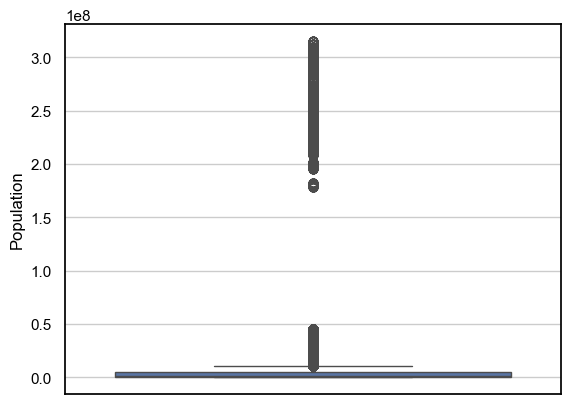

In [209]:
sns.boxplot(df['Population'])

In [210]:
print(max(df['Population']))

315131659.0


In [211]:
print(min(df['Population']))

55536.0


In [212]:
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)
print(q1)
print(q3)
iqr = q3-q1
print(iqr)
lb = q1-1.5*iqr
ub = q3+1.5*iqr
print(lb)
print(ub)
outliers_df = df[(df['Population']<lb) | (df['Population']>ub)]
outliers_df

682825.75
4681585.25
3998759.5
-5315313.5
10679724.5


,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Locality_Nonmetropolitan,Benchmark_2010 Fixed,Benchmark_Floating,Year,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4392.0,26339087.0,3659.0,733.0,16.7
290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4274.0,25815733.0,3578.0,696.0,16.3
292,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,4392.0,26339087.0,3410.0,982.0,22.4
293,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,4274.0,25815733.0,3335.0,939.0,22.0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,4392.0,26339087.0,3659.0,733.0,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205411,0,0,0,1,0,0,0,0,0,0,...,0,1,0,10,3,99492.0,270012383.0,55978.0,43581.0,43.8
205412,0,0,0,1,0,0,0,0,0,0,...,1,1,0,10,3,24145.0,45096916.0,9817.0,14344.0,59.4
205413,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,123637.0,315131659.0,76377.0,47388.0,38.3
205414,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,99492.0,270012383.0,65001.0,34677.0,34.9


In [213]:
upper_fence = q3 + 1.5*iqr
print(upper_fence)

10679724.5


In [214]:
df['Population'] = np.where(df['Population']>upper_fence,upper_fence,df['Population']).tolist()

<Axes: ylabel='Population'>

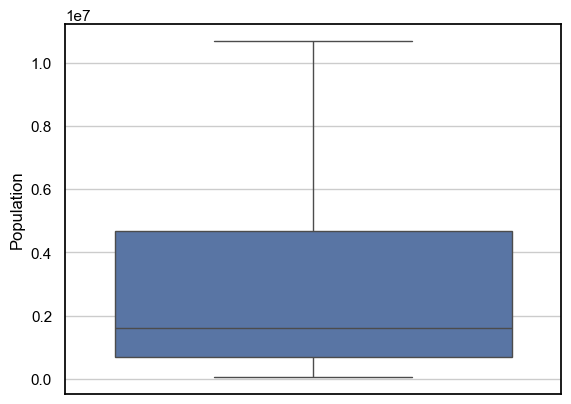

In [215]:
sns.boxplot(df['Population'])

<Axes: ylabel='Observed Deaths'>

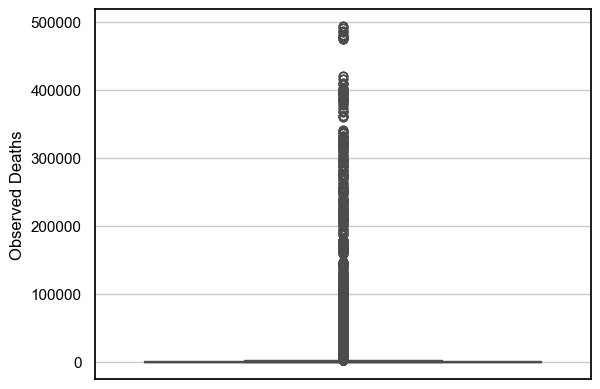

In [216]:
sns.boxplot(df['Observed Deaths'])

In [217]:
q1 = df['Observed Deaths'].quantile(0.25)
q3 = df['Observed Deaths'].quantile(0.75)
iqr = q3-q1

upr_fnc = q3 + 1.5*iqr
df['Observed Deaths'] = np.where(df['Observed Deaths']>upr_fnc,upr_fnc,df['Observed Deaths'])

<Axes: ylabel='Observed Deaths'>

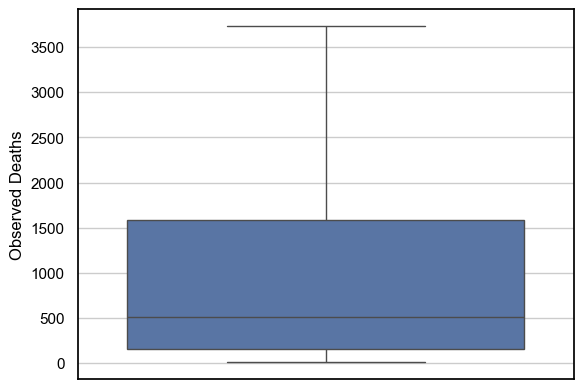

In [218]:
sns.boxplot(df['Observed Deaths'])

<Axes: ylabel='Expected Deaths'>

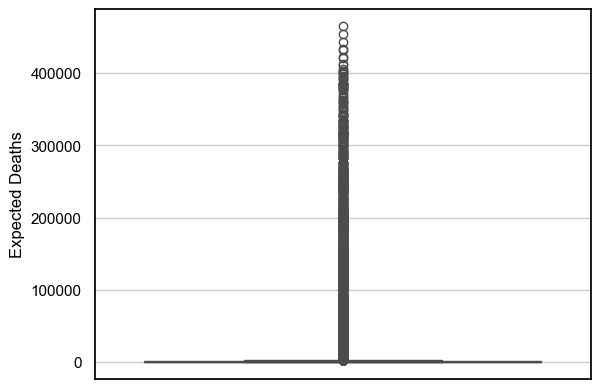

In [219]:
sns.boxplot(df['Expected Deaths'])

<Axes: ylabel='Potentially Excess Deaths'>

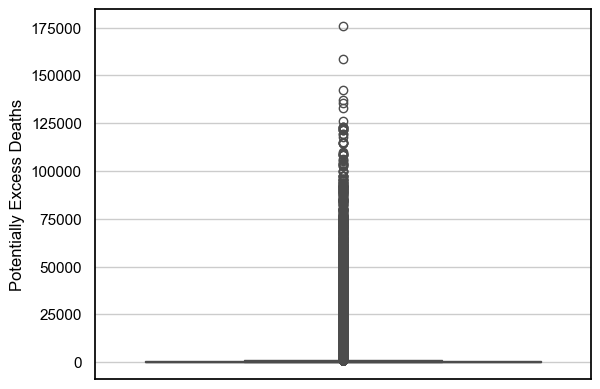

In [220]:
sns.boxplot(df['Potentially Excess Deaths'])

In [221]:
q1 = df['Potentially Excess Deaths'].quantile(0.25)
q3 = df['Potentially Excess Deaths'].quantile(0.75)

iqr = q3-q1

upr_fence = q3 + 1.5*iqr

df['Potentially Excess Deaths'] = np.where(df['Potentially Excess Deaths']>upr_fence,upr_fence,df['Potentially Excess Deaths'])

<Axes: ylabel='Potentially Excess Deaths'>

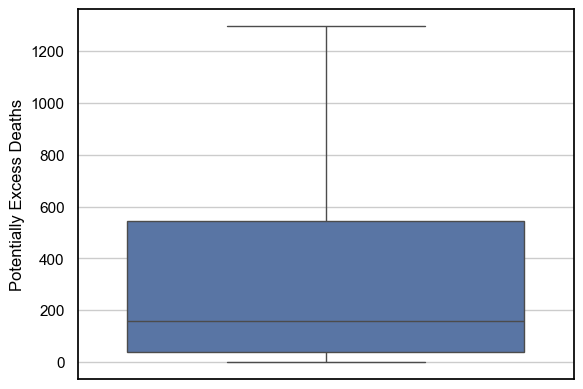

In [222]:
sns.boxplot(df['Potentially Excess Deaths'])

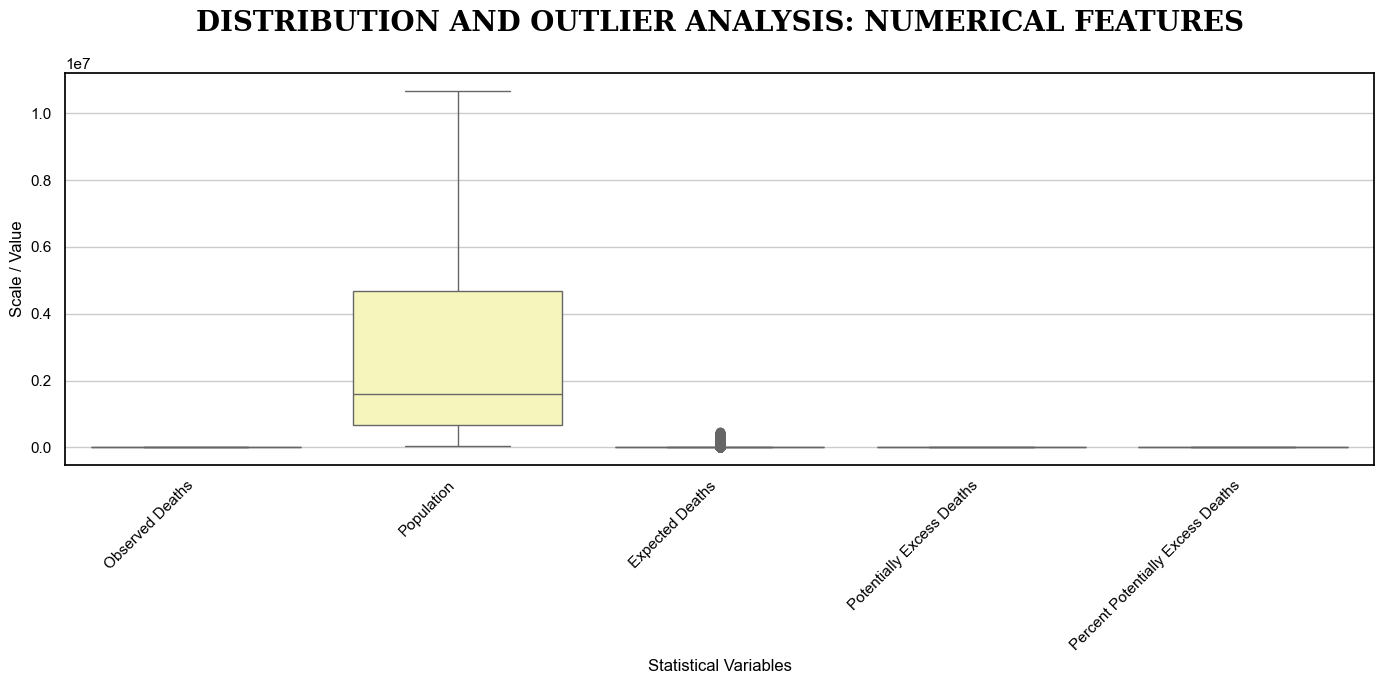

In [223]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[num_cols], palette="Set3")
plt.title('DISTRIBUTION AND OUTLIER ANALYSIS: NUMERICAL FEATURES', 
          color='#000000', fontsize=20, family='serif', fontweight='bold', pad=30)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Scale / Value')
plt.xlabel('Statistical Variables')
plt.tight_layout()
plt.show()

In [224]:
df_cpy

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Metropolitan,93.0,175787.0,36.0,57.0,61.3
205916,2015,Unintentional Injury,Wyoming,WY,8,0-84,2010 Fixed,Nonmetropolitan,259.0,400056.0,82.0,177.0,68.3
205917,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,All,352.0,575843.0,137.0,215.0,61.1
205918,2015,Unintentional Injury,Wyoming,WY,8,0-84,Floating,Metropolitan,93.0,175787.0,42.0,51.0,54.8


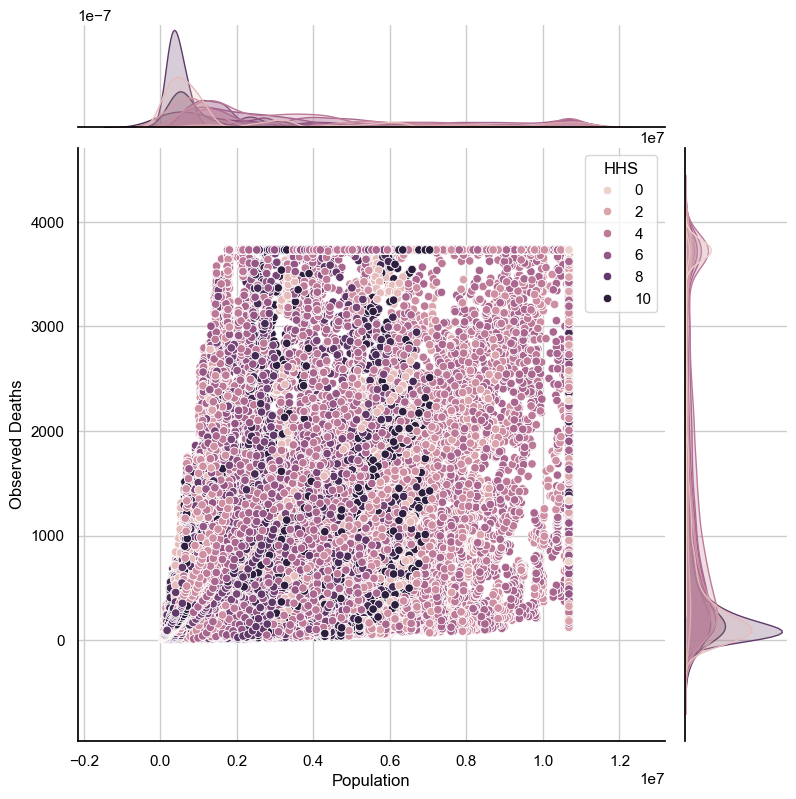

In [225]:
df_tmp = df[num_cols].copy()
df_tmp['HHS'] = df_cpy['HHS Region']
sns.jointplot(
    data=df_tmp,
    x='Population', 
    y='Observed Deaths',
    hue='HHS',
    kind='scatter', 
    height=8
)
plt.show()

<Axes: ylabel='Population'>

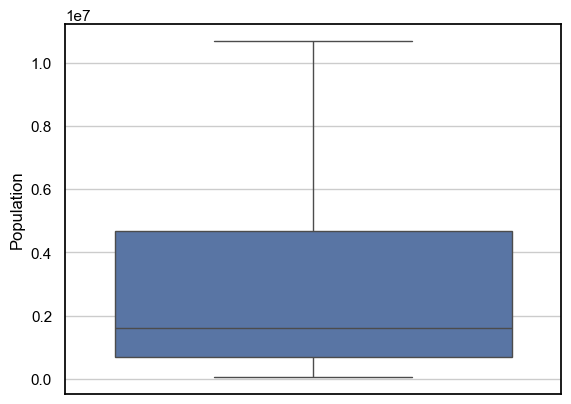

In [160]:
sns.boxplot(df['Population'])

In [161]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [162]:
df

,COD_Chronic Lower Respiratory Disease,COD_Heart Disease,COD_Stroke,COD_Unintentional Injury,HHS_Region_1,HHS_Region_2,HHS_Region_3,HHS_Region_4,HHS_Region_5,HHS_Region_6,...,Locality_Nonmetropolitan,Benchmark_2010 Fixed,Benchmark_Floating,Year,Age Range,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,756.0,3148377.0,451.0,305.0,40.3
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,556.0,2379871.0,341.0,217.0,39.0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,200.0,768506.0,111.0,89.0,44.5
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,756.0,3148377.0,421.0,335.0,44.3
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,556.0,2379871.0,318.0,238.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205915,0,0,0,1,0,0,0,0,0,0,...,0,1,0,10,3,93.0,175787.0,36.0,57.0,61.3
205916,0,0,0,1,0,0,0,0,0,0,...,1,1,0,10,3,259.0,400056.0,82.0,177.0,68.3
205917,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,352.0,575843.0,137.0,215.0,61.1
205918,0,0,0,1,0,0,0,0,0,0,...,0,0,1,10,3,93.0,175787.0,42.0,51.0,54.8


In [163]:
df.isnull().sum()

COD_Chronic Lower Respiratory Disease    0
COD_Heart Disease                        0
COD_Stroke                               0
COD_Unintentional Injury                 0
HHS_Region_1                             0
HHS_Region_2                             0
HHS_Region_3                             0
HHS_Region_4                             0
HHS_Region_5                             0
HHS_Region_6                             0
HHS_Region_7                             0
HHS_Region_8                             0
HHS_Region_9                             0
HHS_Region_10                            0
Locality_Metropolitan                    0
Locality_Nonmetropolitan                 0
Benchmark_2010 Fixed                     0
Benchmark_Floating                       0
Year                                     0
Age Range                                0
Observed Deaths                          0
Population                               0
Expected Deaths                          0
Potentially

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Observed Deaths'),
  Text(1, 0, 'Population'),
  Text(2, 0, 'Expected Deaths'),
  Text(3, 0, 'Potentially Excess Deaths'),
  Text(4, 0, 'Percent Potentially Excess Deaths')])

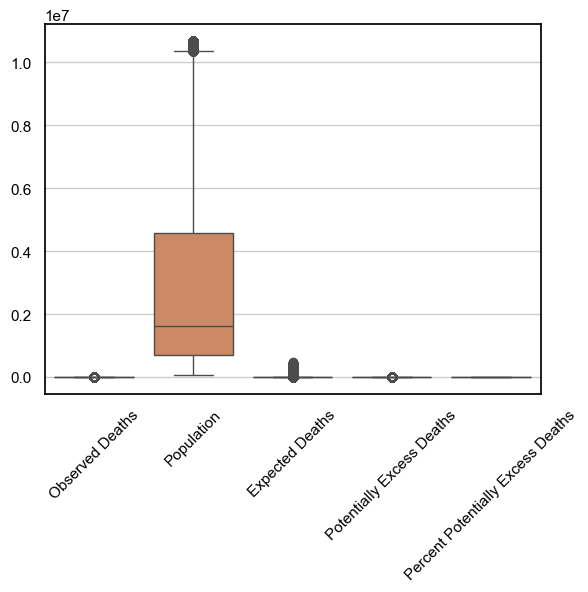

In [164]:
sns.boxplot(df[num_cols])
plt.xticks(rotation=45)

<Figure size 600x600 with 0 Axes>

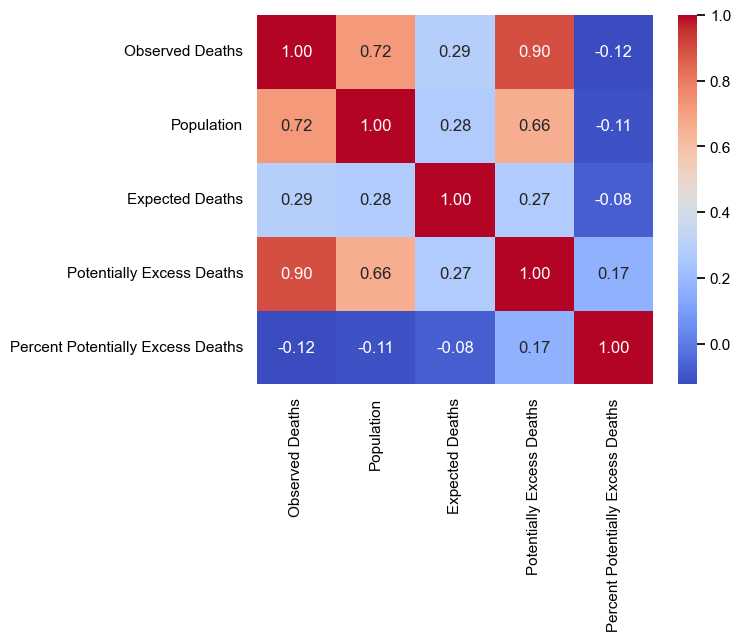

<Figure size 600x600 with 0 Axes>

In [165]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.figure(figsize=(6,6))


In [166]:
target = df['Potentially Excess Deaths']
log_cols = ['Population','Observed Deaths','Expected Deaths','Potentially Excess Deaths']

for col in df[log_cols]:
    df[col] = np.log1p(df[col])
df[log_cols]

,Population,Observed Deaths,Expected Deaths,Potentially Excess Deaths
0,14.962398,6.629363,6.113682,5.723585
1,14.682557,6.322565,5.834811,5.384495
2,13.552205,5.303305,4.718499,4.499810
3,14.962398,6.629363,6.045005,5.817111
4,14.682557,6.322565,5.765191,5.476464
...,...,...,...,...
205915,12.077034,4.543295,3.610918,4.060443
205916,12.899362,5.560682,4.418841,5.181784
205917,13.263592,5.866468,4.927254,5.375278
205918,12.077034,4.543295,3.761200,3.951244


In [167]:
drop_cols = ['Observed Deaths', 'Expected Deaths','Potentially Excess Deaths','Percent Potentially Excess Deaths']

X = df.drop(drop_cols,axis=1) # features
y = df['Potentially Excess Deaths'] # target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
scale_cols = ['Population','Year']

sc = StandardScaler()
X_train[scale_cols] = sc.fit_transform(X_train[scale_cols])
X_test[scale_cols] = sc.transform(X_test[scale_cols])

In [67]:
X_train[scale_cols]

,Population,Year
30725,-0.111834,-1.262008
58159,0.011269,-0.629388
193351,1.228837,1.584782
126111,0.147152,0.319542
26978,1.297242,-1.262008
...,...,...
119879,-0.376669,0.319542
103694,1.366669,0.003232
131932,-0.573077,0.635852
146867,-0.381806,0.635852


In [68]:

def regression_metrics(y_true,y_pred,model_name,model_type):
    r2 = r2_score(y_true,y_pred)
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    print(f"{model_name} - ({model_type} Set): ")
    print(f"    R2-Squared (R2): {r2:.4f}")
    print(f"    RMSE (log Units): {rmse:.4f}")
    print("-"*35)

print("--LINEAR REGRESSION MODELS--")

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

mlr = LinearRegression()
mlr.fit(X_train,y_train)

regression_metrics(y_train,mlr.predict(X_train),"MLR","Training")
regression_metrics(y_test,mlr.predict(X_test),"MLR","Testing")


rg = Ridge(alpha=0.1,random_state=42)
rg.fit(X_train,y_train)

regression_metrics(y_train,rg.predict(X_train),"Ridge","Training")
regression_metrics(y_test,rg.predict(X_test),'Ridge','Testing')

lr = Lasso(alpha=0.0001, random_state=42)
lr.fit(X_train,y_train)

regression_metrics(y_train,lr.predict(X_train),"Lasso","Training")
regression_metrics(y_test,lr.predict(X_test),"Lasso","Testing")

--LINEAR REGRESSION MODELS--
MLR - (Training Set): 
    R2-Squared (R2): 0.6175
    RMSE (log Units): 1.0316
-----------------------------------
MLR - (Testing Set): 
    R2-Squared (R2): 0.6107
    RMSE (log Units): 1.0359
-----------------------------------
Ridge - (Training Set): 
    R2-Squared (R2): 0.6175
    RMSE (log Units): 1.0316
-----------------------------------
Ridge - (Testing Set): 
    R2-Squared (R2): 0.6107
    RMSE (log Units): 1.0359
-----------------------------------
Lasso - (Training Set): 
    R2-Squared (R2): 0.6175
    RMSE (log Units): 1.0317
-----------------------------------
Lasso - (Testing Set): 
    R2-Squared (R2): 0.6106
    RMSE (log Units): 1.0360
-----------------------------------


In [69]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=10 ,n_jobs=-1, random_state=42)

rfr.fit(X_train,y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

regression_metrics(y_train,y_train_pred,"Random Forest","Training")
regression_metrics(y_test,y_test_pred,"Random Forest","Testing")


Random Forest - (Training Set): 
    R2-Squared (R2): 0.8069
    RMSE (log Units): 0.7330
-----------------------------------
Random Forest - (Testing Set): 
    R2-Squared (R2): 0.8015
    RMSE (log Units): 0.7396
-----------------------------------



      Top 10 importances (Random Forest):
     -------------------------------------    
Population                               0.524382
Age Range                                0.102171
COD_Stroke                               0.092527
COD_Chronic Lower Respiratory Disease    0.061902
COD_Unintentional Injury                 0.046146
HHS_Region_4                             0.038558
HHS_Region_8                             0.033960
HHS_Region_1                             0.019179
Locality_Nonmetropolitan                 0.017775
HHS_Region_2                             0.009812
dtype: float64


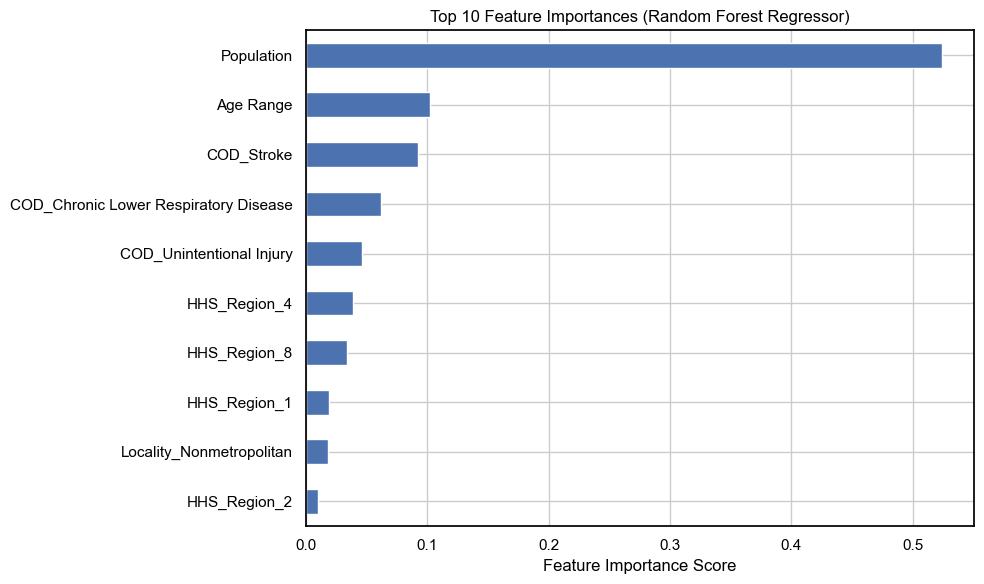

In [70]:
feature_importance = pd.Series(rfr.feature_importances_,index=X_train.columns)
top_10_features = feature_importance.nlargest(10)

print("\n      Top 10 importances (Random Forest):")
print("     -------------------------------------    ")
print(top_10_features)

plt.figure(figsize=(10,6))
top_10_features.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest Regressor)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.savefig('top_10_feature_importances_(Random Forest Regressor)')

In [71]:
"""y_target_continuous = y.reset_index(drop=True)

df['Risk Category'] = pd.qcut(
    y_target_continuous,
    q=4,
    labels=[0,1,2,3],    
    duplicates = 'drop'
).astype(int)


'''
    0 -> LOW RISK CATEGORY (0% to 25%)
    1 -> MEDIUM RISK CATEGORY (25% to 50%)
    2 -> HIGH RISK CATEGORY (50% to 75%)
    3 -> EXTREME RISK CATEGORY (75% to 100%)
'''

df['Risk Category']
"""

"y_target_continuous = y.reset_index(drop=True)\n\ndf['Risk Category'] = pd.qcut(\n    y_target_continuous,\n    q=4,\n    labels=[0,1,2,3],    \n    duplicates = 'drop'\n).astype(int)\n\n\n'''\n    0 -> LOW RISK CATEGORY (0% to 25%)\n    1 -> MEDIUM RISK CATEGORY (25% to 50%)\n    2 -> HIGH RISK CATEGORY (50% to 75%)\n    3 -> EXTREME RISK CATEGORY (75% to 100%)\n'''\n\ndf['Risk Category']\n"

In [72]:
df['Risk Category'] = pd.qcut(
    target,
    q=4,
    labels=[0,1,2,3],    
    duplicates = 'drop'
).astype(int)


'''
    0 -> LOW RISK CATEGORY (0% to 25%)
    1 -> MEDIUM RISK CATEGORY (25% to 50%)
    2 -> HIGH RISK CATEGORY (50% to 75%)
    3 -> EXTREME RISK CATEGORY (75% to 100%)
'''
X_class = df.drop(['Potentially Excess Deaths','Risk Category','Percent Potentially Excess Deaths','Observed Deaths','Expected Deaths'],axis=1)
y_class = df['Risk Category']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( X_class, y_class, test_size=0.25, random_state=42, stratify = y_class )

print("Distribution of y_train_c (Risk Category): \n")
print(y_train_c.value_counts())
print("\nFirst 5 values: \n")
print(y_train_c.head())

Distribution of y_train_c (Risk Category): 

Risk Category
1    42254
0    38810
3    38599
2    34777
Name: count, dtype: int64

First 5 values: 

173421    1
82061     1
169090    1
195853    3
65495     3
Name: Risk Category, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11376\293910474.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




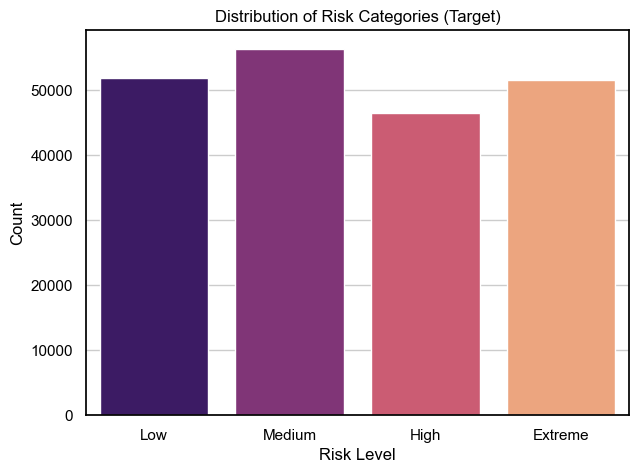

In [73]:
plt.figure(figsize=(7, 5))
sns.countplot(x=y_class, palette='magma')
plt.xticks(ticks=[0,1,2,3], labels=['Low', 'Medium', 'High', 'Extreme'])
plt.title('Distribution of Risk Categories (Target)')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

In [74]:
import warnings
warnings.filterwarnings('ignore')

def classification_metrics(y_true,y_pred,model_name,model_type):
    accuracy = accuracy_score(y_true,y_pred)

    print(f"{model_name} - ({model_type} Set): ")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true,y_pred))
    print("-"*35)

X_train_c.columns = X_train_c.columns.astype(str)
X_test_c.columns = X_test_c.columns.astype(str)

lr = LogisticRegression( solver='newton-cg', random_state=42, max_iter=1000)
lr.fit(X_train_c, y_train_c)

y_train_pred_lr = lr.predict(X_train_c)
y_test_pred_lr = lr.predict(X_test_c)

classification_metrics(y_train_c, y_train_pred_lr, "Logistic Regression","Training")
classification_metrics(y_test_c, y_test_pred_lr, "Logistic Regression","Testing")

Logistic Regression - (Training Set): 
Accuracy: 0.6593

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70     38810
           1       0.55      0.53      0.54     42254
           2       0.56      0.58      0.57     34777
           3       0.81      0.84      0.83     38599

    accuracy                           0.66    154440
   macro avg       0.66      0.66      0.66    154440
weighted avg       0.66      0.66      0.66    154440

-----------------------------------
Logistic Regression - (Testing Set): 
Accuracy: 0.6568

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     12937
           1       0.55      0.53      0.54     14085
           2       0.56      0.57      0.56     11592
           3       0.81      0.84      0.82     12866

    accuracy                           0.66     51480
   macro avg       0.66      0.66      0.66 

In [75]:
#drop_features = ['Percent Potentially Excess Deaths']

X_train_policy = X_train_c#.drop(drop_features,axis=1)
X_test_policy = X_test_c#.drop(drop_features,axis=1)

print(f"Original Feature Count: {X_train_c.shape[1]}") # Number of Columns
print(f"Policy-Relevant Feature Count: {X_train_policy.shape[1]}") 
print("\n--- Training Logistic Regression on Policy Features ---")

lr_policy = LogisticRegression( random_state=42, max_iter=1000, solver = 'newton-cg')
lr_policy.fit(X_train_policy,y_train_c)

y_test_pred_policy = lr_policy.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_policy, "Logistic Regression (Policy)","Testing")

Original Feature Count: 21
Policy-Relevant Feature Count: 21

--- Training Logistic Regression on Policy Features ---
Logistic Regression (Policy) - (Testing Set): 
Accuracy: 0.6568

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     12937
           1       0.55      0.53      0.54     14085
           2       0.56      0.57      0.56     11592
           3       0.81      0.84      0.82     12866

    accuracy                           0.66     51480
   macro avg       0.66      0.66      0.66     51480
weighted avg       0.66      0.66      0.66     51480

-----------------------------------


In [76]:
print("\n--- Training Decision Tree on Policy Features ---")

dt = DecisionTreeClassifier(max_depth=10, random_state = 42)
dt.fit(X_train_policy, y_train_c)

y_test_pred_dtc = dt.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_dtc, "Decision Tree (Policy)","Testing")

'''plt.figure(figsize=(20,10))
plot_tree(dt,filled=True,class_names=['0','1','2','3'],rounded=True) # filled used to show the bars in different colors
plt.show()'''


--- Training Decision Tree on Policy Features ---
Decision Tree (Policy) - (Testing Set): 
Accuracy: 0.7542

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81     12937
           1       0.71      0.69      0.70     14085
           2       0.67      0.65      0.66     11592
           3       0.80      0.90      0.84     12866

    accuracy                           0.75     51480
   macro avg       0.75      0.75      0.75     51480
weighted avg       0.75      0.75      0.75     51480

-----------------------------------


"plt.figure(figsize=(20,10))\nplot_tree(dt,filled=True,class_names=['0','1','2','3'],rounded=True) # filled used to show the bars in different colors\nplt.show()"

In [77]:
print("\n--- Training K-Nearest Neighbors on Policy Features ---")

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_policy, y_train_c)

y_test_pred_knn = knn.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_knn, "K-Nearest Neighbors (Policy)","Testing")


--- Training K-Nearest Neighbors on Policy Features ---
K-Nearest Neighbors (Policy) - (Testing Set): 
Accuracy: 0.7017

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     12937
           1       0.61      0.63      0.62     14085
           2       0.62      0.59      0.60     11592
           3       0.84      0.80      0.82     12866

    accuracy                           0.70     51480
   macro avg       0.70      0.70      0.70     51480
weighted avg       0.70      0.70      0.70     51480

-----------------------------------


In [78]:
print("\n--- Training Gaussian Naive Bayes on Policy Features ---")

gb = GaussianNB()
gb.fit(X_train_policy,y_train_c)

y_test_pred_gb = gb.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_gb, "Gaussian Naive Bayes (Policy)", "Testing")


--- Training Gaussian Naive Bayes on Policy Features ---
Gaussian Naive Bayes (Policy) - (Testing Set): 
Accuracy: 0.5265

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.61     12937
           1       0.49      0.27      0.35     14085
           2       0.37      0.28      0.32     11592
           3       0.59      0.87      0.70     12866

    accuracy                           0.53     51480
   macro avg       0.50      0.53      0.50     51480
weighted avg       0.50      0.53      0.50     51480

-----------------------------------


In [79]:
print("\n--- Training Random Forest Classifier on Policy Features ---")
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=20)
rfc.fit(X_train_policy, y_train_c)

y_test_pred_rfc = rfc.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_rfc, "Random Forest Classifier (Policy)","Testing")


--- Training Random Forest Classifier on Policy Features ---
Random Forest Classifier (Policy) - (Testing Set): 
Accuracy: 0.8643

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12937
           1       0.82      0.82      0.82     14085
           2       0.83      0.83      0.83     11592
           3       0.93      0.94      0.93     12866

    accuracy                           0.86     51480
   macro avg       0.86      0.86      0.86     51480
weighted avg       0.86      0.86      0.86     51480

-----------------------------------


---- Top 10 Feature Importances (decision Tree Policy)----
Population                               0.454389
Age Range                                0.131416
COD_Stroke                               0.080518
COD_Chronic Lower Respiratory Disease    0.058277
HHS_Region_4                             0.052810
COD_Unintentional Injury                 0.049445
HHS_Region_6                             0.026044
Locality_Nonmetropolitan                 0.023453
HHS_Region_3                             0.019819
HHS_Region_2                             0.016542
dtype: float64


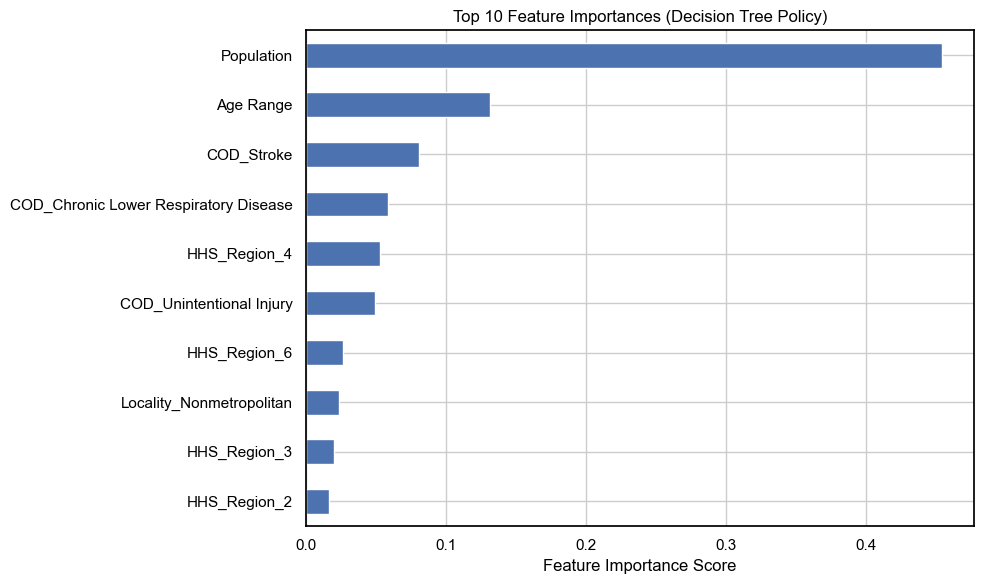

In [80]:
# As Decision tree classifier showed a very high accuracy so we'll consider that one for predicting further outputs
# chceking what are main features behind this high accuarcy

features_import = pd.Series(dt.feature_importances_, index = X_train_policy.columns)
top_10 = features_import.nlargest(10)
print("---- Top 10 Feature Importances (decision Tree Policy)----")
print(top_10)

plt.figure(figsize=(10,6))
top_10.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Feature Importances (Decision Tree Policy)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.savefig('top_10_feature_importances_(decision_tree_policy)')

In [81]:
#!pip install xgboost

In [82]:

print("\n--- Training XGBoost Classifier on Policy Features ---")
xg = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric = 'merror',
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

xg.fit(X_train_policy,y_train_c)
y_test_pred_xg = xg.predict(X_test_policy)

classification_metrics(y_test_c, y_test_pred_xg, 'XGBoost Classifier','Testing')




--- Training XGBoost Classifier on Policy Features ---
XGBoost Classifier - (Testing Set): 
Accuracy: 0.8191

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12937
           1       0.77      0.73      0.75     14085
           2       0.78      0.77      0.77     11592
           3       0.90      0.93      0.91     12866

    accuracy                           0.82     51480
   macro avg       0.82      0.82      0.82     51480
weighted avg       0.82      0.82      0.82     51480

-----------------------------------


---- Top 3 Feature Importances (XGBoost Classifier Policy)----
COD_Stroke                               0.089444
HHS_Region_4                             0.089131
Population                               0.088307
HHS_Region_8                             0.083789
COD_Chronic Lower Respiratory Disease    0.074055
Age Range                                0.067523
COD_Unintentional Injury                 0.055325
HHS_Region_6                             0.054422
HHS_Region_1                             0.053668
HHS_Region_2                             0.048467
dtype: float32


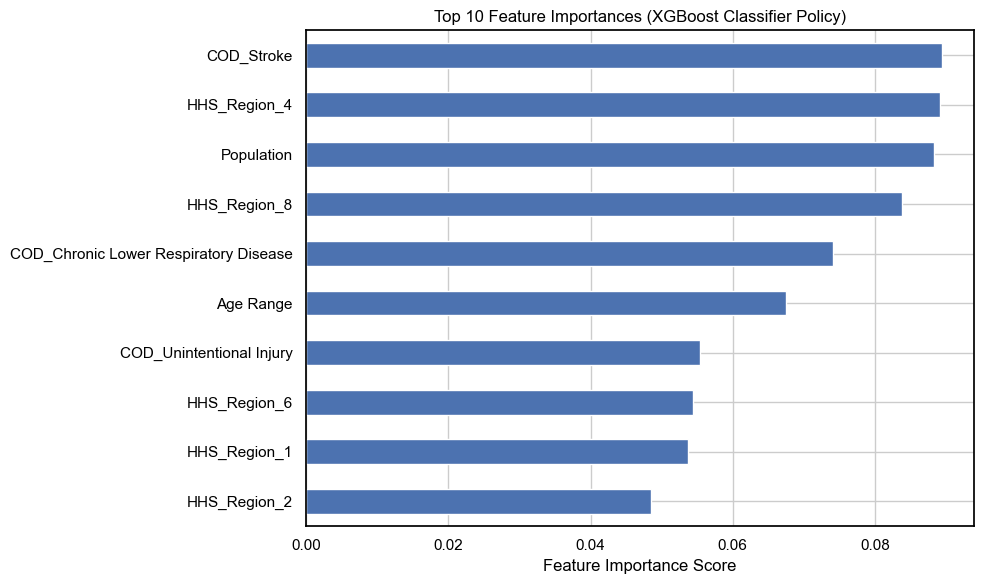

In [226]:
features_import = pd.Series(xg.feature_importances_, index = X_train_policy.columns)
top_3 = features_import.nlargest(10)
print("---- Top 3 Feature Importances (XGBoost Classifier Policy)----")
print(top_3)

plt.figure(figsize=(10,6))
top_3.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Feature Importances (XGBoost Classifier Policy)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.savefig('top_3_feature_importances_(XGBoost_Classifier_policy)')

In [84]:
#!pip install graphviz